### 비지도 학습 예제 1
- 문제

- **데이터 준비 및 전처리**
    - "**Red** Wine Quality Dataset"을 로드하고, 주요 특성(와인의 화학적 특성)을 선택하세요.
    - 데이터를 정규화하여 클러스터링을 위한 준비를 하세요.
    - 주요 열은 와인의 화학적 특성('fixed acidity', 'volatile acidity' 등)과 품질 점수(quality)
    - 
- **K-Means 클러스터링 적용**
    - 클러스터 수를 3으로 설정하고 K-Means 알고리즘을 사용해 클러스터링을 수행하세요.
    - 각 데이터 포인트의 클러스터 레이블을 데이터프레임에 추가하세요.
    - 
- **클러스터 품질 해석**
    - 각 클러스터의 특성을 분석하고 평균값을 비교하여 클러스터별 차이를 해석하세요.
    - 각 클러스터가 특정 와인 품질(quality) 점수와 관련이 있는지 탐색하세요.
    - 
- **결과 시각화**
    - PCA를 사용해 데이터를 2차원으로 축소하고 클러스터링 결과를 시각화하세요.

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [127]:
# 데이터셋 로드
df = pd.read_csv('wine_quality_red.csv')

# 주요 특성 선택
columns = ['fixed acidity', 'alcohol', 'quality']
df_selected = df[columns]


In [132]:
#데이터 정규화
scaler = StandardScaler()
scaled = scaler.fit_transform(df_selected)
df_scaled = pd.DataFrame(scaled, columns=columns)

In [133]:
# K-Means 모델 생성 및 학습
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)


In [134]:
print(cluster_labels)

[2 2 2 ... 1 2 1]


c:\Users\choyk\Documents\GitHub\Sk-Study\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\choyk\Documents\GitHub\Sk-Study\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


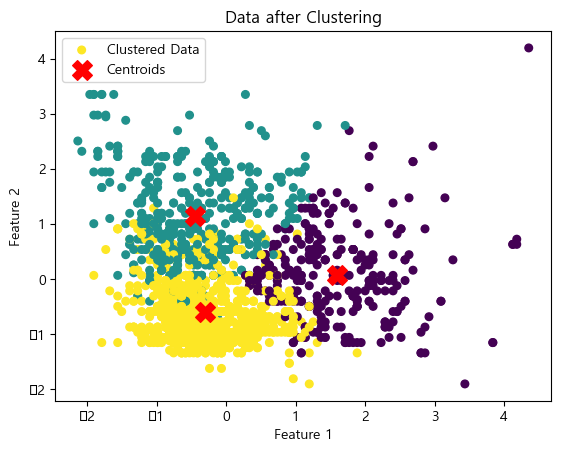

In [135]:
#군집화 결과 시각화
plt.scatter(df_scaled.iloc[:,0], df_scaled.iloc[:,1], c=cluster_labels, cmap='viridis', s=30, label='Clustered Data')

# 클러스터 중심 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

In [137]:
# 최적의 K 찾기
# 다양한 K 값에 대한 Inertia 계산
result=[]

for k in range(1,10):
    kmeans_temp = KMeans(n_clusters=k,random_state=42)
    kmeans_temp.fit(df_scaled)
    result.append(kmeans_temp.inertia_)

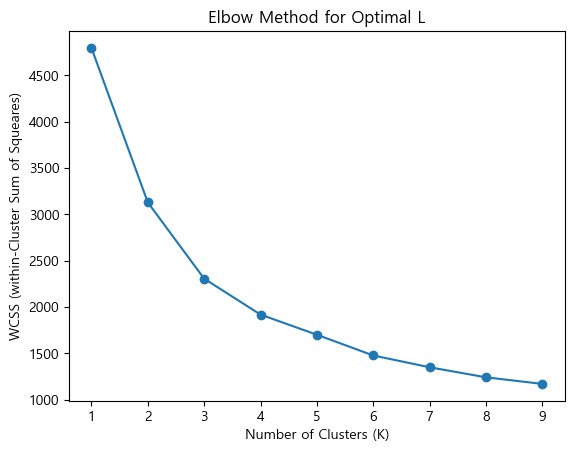

In [138]:
# 엘보우 그래프 그리기
plt.plot(range(1,10), result, marker='o')
plt.title('Elbow Method for Optimal L')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (within-Cluster Sum of Squeares)')
plt.show()

In [139]:
#데이터 프레임에 추가
df_scaled['Cluster'] = cluster_labels

In [140]:
df_scaled

,fixed acidity,alcohol,quality,Cluster
0,-0.528360,-0.960246,-0.787823,2
1,-0.298547,-0.584777,-0.787823,2
2,-0.298547,-0.584777,-0.787823,2
3,1.654856,-0.584777,0.450848,0
4,-0.528360,-0.960246,-0.787823,2
...,...,...,...,...
1594,-1.217796,0.072294,-0.787823,2
1595,-1.390155,0.729364,0.450848,1
1596,-1.160343,0.541630,0.450848,1
1597,-1.390155,-0.209308,-0.787823,2


In [141]:
# kmeans.cluster_centers_: 클러스터 중심 좌표
# kmeans.inertia_: 클러스터 내 거리 합 (WCSS)
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Inertia (WCSS):", kmeans.inertia_)

Cluster Centers:
 [[ 1.59150032  0.08215184  0.40842812]
 [-0.45594759  1.14318773  0.9017931 ]
 [-0.30565503 -0.59579818 -0.58492464]]
Inertia (WCSS): 2306.2309226775515


In [142]:
# 품질 열이 있는 원본 데이터프레임에 클러스터 레이블 추가
df_quality = pd.read_csv('wine_quality_red.csv')
df_quality['Cluster'] = cluster_labels

# 클러스터별 품질 평균 확인
print(df_quality.groupby('Cluster')['quality'].mean())

Cluster
0    5.965753
1    6.364055
2    5.163803
Name: quality, dtype: float64


### 1번의 품질 평균이 제일 높고, 그 다음 0번, 마지막으로 2번 순으로 높다.

### PCA 사용

In [144]:
#데이터 정규화
df_scaled

,fixed acidity,alcohol,quality,Cluster
0,-0.528360,-0.960246,-0.787823,2
1,-0.298547,-0.584777,-0.787823,2
2,-0.298547,-0.584777,-0.787823,2
3,1.654856,-0.584777,0.450848,0
4,-0.528360,-0.960246,-0.787823,2
...,...,...,...,...
1594,-1.217796,0.072294,-0.787823,2
1595,-1.390155,0.729364,0.450848,1
1596,-1.160343,0.541630,0.450848,1
1597,-1.390155,-0.209308,-0.787823,2


In [145]:
#PCA 객체 생성
pca = PCA(n_components=2) #데이터를 2차원으로 축소

In [146]:
x_pca = pca.fit_transform(df_scaled)

In [147]:
#PCA 출력
print(pca.explained_variance_ratio_)  

[0.50002276 0.31694004]


c:\Users\choyk\Documents\GitHub\Sk-Study\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


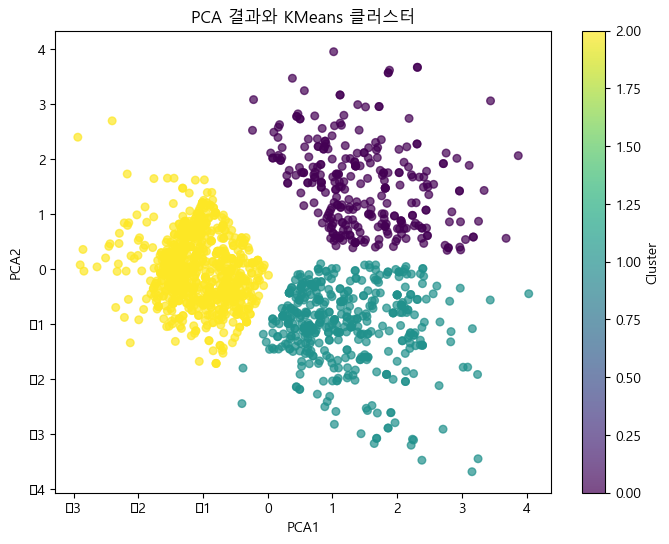

In [148]:
#PCA 결과 시각화
# - 두 개의 주성분을 사용해 데이터를 2D 플롯으로 시각화
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cluster_labels, cmap='viridis', s=30, alpha=0.7)
plt.title('PCA 결과와 KMeans 클러스터')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()